# Time Series Analysis
* the Value at t, depends on the values on t-1 and t-2, then we say its time series
* lag is the amount of t's that t depends on.
* we mainly focus on extrapolation or forecasting.

1. Time Series EDA
* Pandas Data Reader - FInancial Data
* Date time Index
* Time Resampling
* Time Shifts
* Mean Rolling and expanding
* Time Series Visualization
* One samplie Project on Time Series

In [63]:
import pandas as pd

In [64]:
df= pd.read_csv('/content/TSLA.csv')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       252 non-null    float64       
 2   High       252 non-null    float64       
 3   Low        252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Adj Close  252 non-null    float64       
 6   Volume     252 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [66]:
df['Date'] = df['Date'].astype('datetime64[ns]') # turn date column into datetime since its object now

In [68]:
df.set_index('Date',inplace=True) # set Date col as index

In [69]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-30,238.240005,243.666672,237.576660,243.636673,243.636673,55812600
2021-08-31,244.333328,246.796661,242.146667,245.240005,245.240005,62566200
2021-09-01,244.693329,247.330002,243.756668,244.696671,244.696671,39612900
2021-09-02,244.833328,246.990005,243.513336,244.130005,244.130005,38331900
2021-09-03,244.083328,244.666672,241.399994,244.523331,244.523331,45738300


In [70]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-23,291.453339,298.826660,287.923340,296.453339,296.453339,63984900
2022-08-24,297.563324,303.646667,296.500000,297.096680,297.096680,57259800
2022-08-25,302.359985,302.959991,291.600006,296.070007,296.070007,53230000
2022-08-26,297.429993,302.000000,287.470001,288.089996,288.089996,56905800
2022-08-29,282.829987,287.739990,280.700012,284.820007,284.820007,41728500


In [71]:
columns = df.columns

In [72]:
from ipywidgets import widgets
def des(column):
  return df[column].describe(),df[column].plot(kind='box')
widgets.interact(des,column=df.columns);

interactive(children=(Dropdown(description='column', options=('Open', 'High', 'Low', 'Close', 'Adj Close', 'Vo…

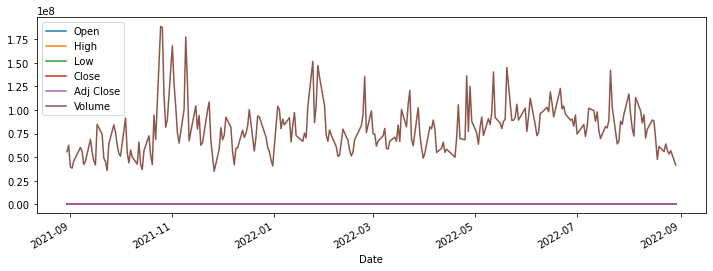

In [74]:
df.plot(figsize=(12,4))

In [75]:
from ipywidgets import widgets
def des(column):
  return df[column].plot(figsize=(12,4))
widgets.interact(des,column=df.columns);

interactive(children=(Dropdown(description='column', options=('Open', 'High', 'Low', 'Close', 'Adj Close', 'Vo…

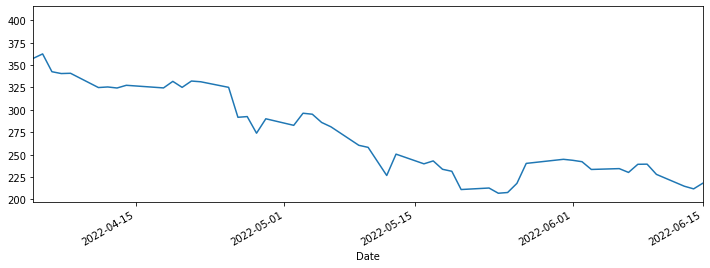

In [76]:
#Specify xlim and ylimit, in order to see in detail what happens in certain period
df['Low'].plot(xlim=['2022-04-04','2022-06-15'],figsize=(12,4))

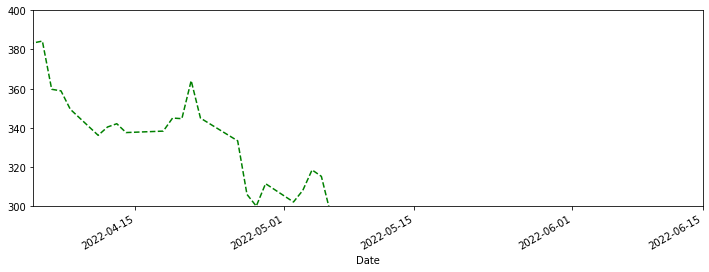

In [81]:
#Specify xlim and ylimit, in order to see in detail what happens in certain period
df['High'].plot(xlim=['2022-04-04','2022-06-15'],ylim=(300,400),figsize=(12,4),ls='--',c='green')

In [82]:
df.index

DatetimeIndex(['2021-08-30', '2021-08-31', '2021-09-01', '2021-09-02',
               '2021-09-03', '2021-09-07', '2021-09-08', '2021-09-09',
               '2021-09-10', '2021-09-13',
               ...
               '2022-08-16', '2022-08-17', '2022-08-18', '2022-08-19',
               '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25',
               '2022-08-26', '2022-08-29'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [84]:
ind = df.loc['2021-08-30':'2021-09-13'].index
open_stock = df.loc['2021-08-30':'2021-09-13']['Open']

In [86]:
open_stock

Date
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
2021-09-02    244.833328
2021-09-03    244.083328
2021-09-07    246.666672
2021-09-08    253.860001
2021-09-09    251.136673
2021-09-10    253.199997
2021-09-13    246.736664
Name: Open, dtype: float64

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

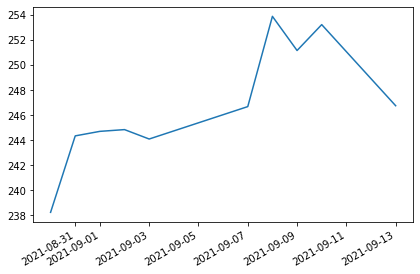

In [92]:
figure,axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate() #prevents overlapping
axis.plot(ind,open_stock)

In [93]:
#plotting Candlestick viz for data
!pip install mpl_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdate

In [95]:
df.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-30,238.240005,243.666672,237.576660,243.636673,243.636673,55812600
2021-08-31,244.333328,246.796661,242.146667,245.240005,245.240005,62566200


In [97]:
data = df[['Open','High','Low','Close']]

In [98]:
data.head()

,Open,High,Low,Close
Date,,,,
2021-08-30,238.240005,243.666672,237.576660,243.636673
2021-08-31,244.333328,246.796661,242.146667,245.240005
2021-09-01,244.693329,247.330002,243.756668,244.696671
2021-09-02,244.833328,246.990005,243.513336,244.130005
2021-09-03,244.083328,244.666672,241.399994,244.523331


In [100]:
data.reset_index(inplace=True)

In [101]:
data['Date'] = data['Date'].map(mdate.date2num) # convert to numbers for func

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
data.head()

,Date,Open,High,Low,Close
0,738032.0,238.240005,243.666672,237.576660,243.636673
1,738033.0,244.333328,246.796661,242.146667,245.240005
2,738034.0,244.693329,247.330002,243.756668,244.696671
3,738035.0,244.833328,246.990005,243.513336,244.130005
4,738036.0,244.083328,244.666672,241.399994,244.523331


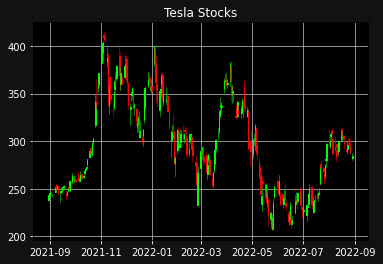

In [115]:
ax=plt.subplot()
ax.grid(True)
ax.set_axisbelow(True)
ax.set_title('Tesla Stocks',color='white')
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x',colors= 'white')
ax.tick_params(axis='y',colors= 'white')
ax.xaxis_date() # retrun back to date format
candlestick_ohlc(ax,data.values,width=0.7,colorup='#00ff00');

# Resampling
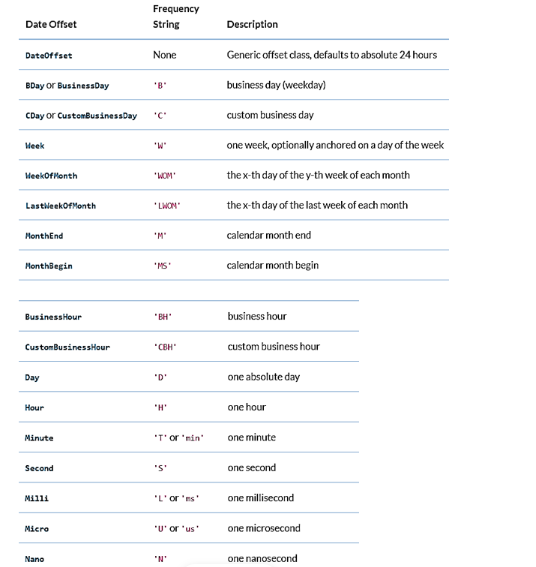

In [116]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-30,238.240005,243.666672,237.576660,243.636673,243.636673,55812600
2021-08-31,244.333328,246.796661,242.146667,245.240005,245.240005,62566200
2021-09-01,244.693329,247.330002,243.756668,244.696671,244.696671,39612900
2021-09-02,244.833328,246.990005,243.513336,244.130005,244.130005,38331900
2021-09-03,244.083328,244.666672,241.399994,244.523331,244.523331,45738300


In [122]:
# use Rule A, Find Min for each year, in each column(like groupby func)
# A means year end frequency
df.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-31,238.240005,243.666672,236.283340,243.389999,243.389999,35042700
2022-12-31,207.949997,217.973328,206.856674,209.386673,209.386673,41728500


In [119]:
df.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-31,411.470001,414.496674,405.666656,409.970001,409.970001,188556300
2022-12-31,396.516663,402.666656,378.679993,399.926666,399.926666,151565700


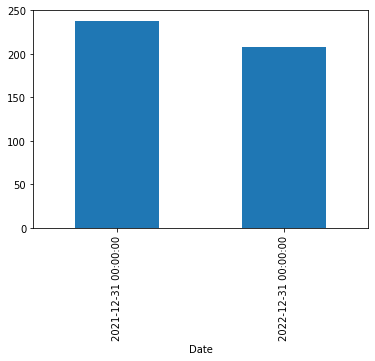

In [121]:
# we can plot this data
df.resample(rule='A').min()['Open'].plot(kind='bar')

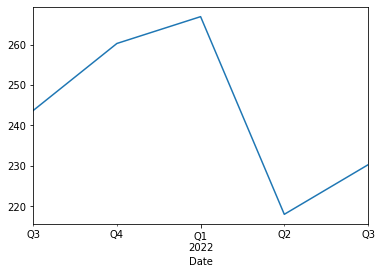

In [124]:
# quarterly start frequency
df.resample(rule='QS').min()['High'].plot()

In [126]:
# business end frequency
df.resample(rule='BA').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-31,238.240005,243.666672,236.283340,243.389999,243.389999,35042700
2022-12-30,207.949997,217.973328,206.856674,209.386673,209.386673,41728500


In [127]:
# business quarters frequency
df.resample(rule='BQS').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,238.240005,243.666672,236.283340,243.389999,243.389999,35842500
2021-10-01,258.733337,260.260010,254.529999,258.406677,258.406677,35042700
2022-01-03,233.463333,266.899994,233.333328,254.679993,254.679993,48992700
2022-04-01,207.949997,217.973328,206.856674,209.386673,209.386673,49847700
2022-07-01,223.000000,230.229996,216.166672,227.263336,227.263336,41728500


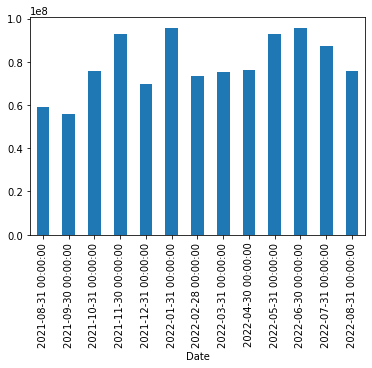

In [129]:
#monthly freq
df.resample(rule='M').mean()['Volume'].plot(kind='bar')

# Rolling 
* shows mean,min or stats for the first rolling numbers for that column

In [132]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-30,238.240005,243.666672,237.576660,243.636673,243.636673,55812600
2021-08-31,244.333328,246.796661,242.146667,245.240005,245.240005,62566200
2021-09-01,244.693329,247.330002,243.756668,244.696671,244.696671,39612900
2021-09-02,244.833328,246.990005,243.513336,244.130005,244.130005,38331900
2021-09-03,244.083328,244.666672,241.399994,244.523331,244.523331,45738300


In [134]:
mean1 = (238.240005+244.333328)/2
print(mean1)
df['Open'].rolling(2).mean()

241.2866665


Date
2021-08-30           NaN
2021-08-31    241.286666
2021-09-01    244.513329
2021-09-02    244.763329
2021-09-03    244.458328
                 ...    
2022-08-23    291.683335
2022-08-24    294.508332
2022-08-25    299.961655
2022-08-26    299.894989
2022-08-29    290.129990
Name: Open, Length: 252, dtype: float64

In [135]:
df['Open:30 days rolling']= df['Open'].rolling(30).mean()

In [136]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling
Date,,,,,,,
2021-08-30,238.240005,243.666672,237.576660,243.636673,243.636673,55812600,NaN
2021-08-31,244.333328,246.796661,242.146667,245.240005,245.240005,62566200,NaN
2021-09-01,244.693329,247.330002,243.756668,244.696671,244.696671,39612900,NaN
2021-09-02,244.833328,246.990005,243.513336,244.130005,244.130005,38331900,NaN
2021-09-03,244.083328,244.666672,241.399994,244.523331,244.523331,45738300,NaN


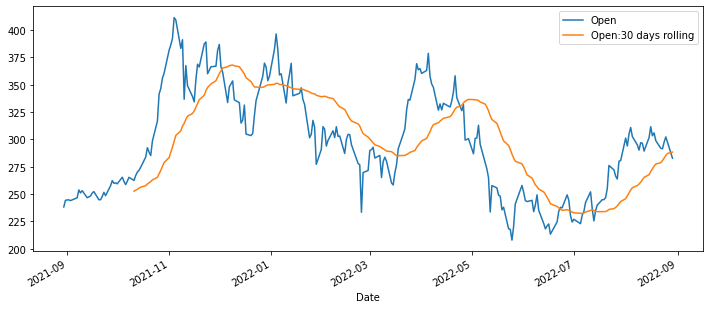

In [139]:
df[['Open','Open:30 days rolling']].plot(figsize=(12,5)) # the orange line is the smoothened version of the blue line, this is an exaple of smoothening(Moving Averages)
#smoothening is done to mitigate the flactuations of stock prices for a certain time period, hence smoothens the curve